In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler

In [5]:
# reading data from the file
dataset_train=pd.read_csv("Google_Stock_Price_Train.csv")

In [6]:
#print(dataset_train)
training_set=dataset_train.iloc[:,1:2].values
print(training_set)
sc=MinMaxScaler(feature_range=(0,1))
training_set_scaled=sc.fit_transform(training_set)
print(training_set_scaled)
X_train=[]
Y_train=[]

[[325.25]
 [331.27]
 [329.83]
 ...
 [793.7 ]
 [783.33]
 [782.75]]
[[0.08581368]
 [0.09701243]
 [0.09433366]
 ...
 [0.95725128]
 [0.93796041]
 [0.93688146]]


In [7]:
for i in range(60,1258):
 X_train.append(training_set_scaled[i-60:i,0])
 Y_train.append(training_set_scaled[i,0])
X_train,Y_train=np.array(X_train),np.array(Y_train)
print(X_train)
print('*********************************************')
print(Y_train)
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
print('**********************************************')
print(X_train)

[[0.08581368 0.09701243 0.09433366 ... 0.07846566 0.08034452 0.08497656]
 [0.09701243 0.09433366 0.09156187 ... 0.08034452 0.08497656 0.08627874]
 [0.09433366 0.09156187 0.07984225 ... 0.08497656 0.08627874 0.08471612]
 ...
 [0.92106928 0.92438053 0.93048218 ... 0.95475854 0.95204256 0.95163331]
 [0.92438053 0.93048218 0.9299055  ... 0.95204256 0.95163331 0.95725128]
 [0.93048218 0.9299055  0.93113327 ... 0.95163331 0.95725128 0.93796041]]
*********************************************
[0.08627874 0.08471612 0.07454052 ... 0.95725128 0.93796041 0.93688146]
**********************************************
[[[0.08581368]
  [0.09701243]
  [0.09433366]
  ...
  [0.07846566]
  [0.08034452]
  [0.08497656]]

 [[0.09701243]
  [0.09433366]
  [0.09156187]
  ...
  [0.08034452]
  [0.08497656]
  [0.08627874]]

 [[0.09433366]
  [0.09156187]
  [0.07984225]
  ...
  [0.08497656]
  [0.08627874]
  [0.08471612]]

 ...

 [[0.92106928]
  [0.92438053]
  [0.93048218]
  ...
  [0.95475854]
  [0.95204256]
  [0.95163

In [8]:
regressor=Sequential()
regressor.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units=1))
regressor.compile(optimizer='adam',loss='mean_squared_error')
regressor.fit(X_train,Y_train,epochs=100,batch_size=32)

Epoch 1/100
38/38 [==============================] - 13s 102ms/step - loss: 0.0360
Epoch 2/100
38/38 [==============================] - 4s 111ms/step - loss: 0.0061
Epoch 3/100
38/38 [==============================] - 4s 101ms/step - loss: 0.0056
Epoch 4/100
38/38 [==============================] - 4s 97ms/step - loss: 0.0066
Epoch 5/100
38/38 [==============================] - 4s 113ms/step - loss: 0.0054
Epoch 6/100
38/38 [==============================] - 4s 104ms/step - loss: 0.0053
Epoch 7/100
38/38 [==============================] - 4s 94ms/step - loss: 0.0046
Epoch 8/100
38/38 [==============================] - 4s 95ms/step - loss: 0.0045
Epoch 9/100
38/38 [==============================] - 4s 107ms/step - loss: 0.0043
Epoch 10/100
38/38 [==============================] - 4s 103ms/step - loss: 0.0037
Epoch 11/100
38/38 [==============================] - 11s 302ms/step - loss: 0.0044
Epoch 12/100
38/38 [==============================] - 9s 246ms/step - loss: 0.0043
Epoch 13/100
3

In [9]:
# reading data from the file
dataset_test=pd.read_csv("Google_Stock_Price_Test.csv")

1/1 [==============================] - 3s 3s/step


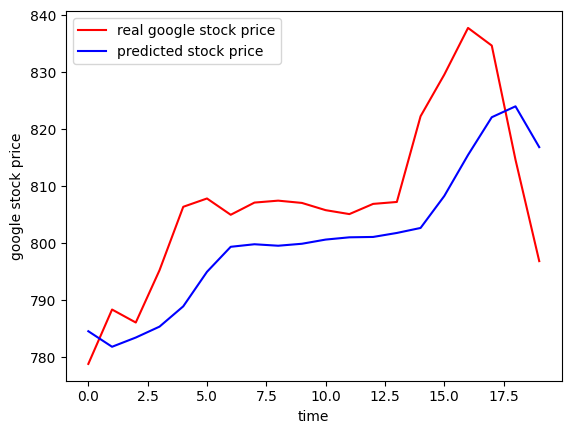

In [10]:
real_stock_price=dataset_test.iloc[:,1:2].values
dataset_total=pd.concat((dataset_train['Open'],dataset_test['Open']),axis=0)
inputs=dataset_total[len(dataset_total)-len(dataset_test)-60:].values
inputs=inputs.reshape(-1,1)
inputs=sc.transform(inputs)
X_test=[]
for i in range(60,80):
 X_test.append(inputs[i-60:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_stock_price=regressor.predict(X_test)
predicted_stock_price=sc.inverse_transform(predicted_stock_price)
plt.plot(real_stock_price,color='red',label='real google stock price')
plt.plot(predicted_stock_price,color='blue',label='predicted stock price')
plt.xlabel('time')
plt.ylabel('google stock price')
plt.legend()
plt.show()